# Project 6 OpenClassroom

In [1]:
## To display the graphs within the code and not in another windows 
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
# To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)

# To be able to use Warning
import warnings

import string
import re
from collections import defaultdict  # For word frequency
from time import time
from gensim.models.phrases import Phrases, Phraser
import logging  # Setting up the loggings to monitor gensim
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize

Python Version :sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.18.1
Pandas Version :1.0.1
Seaborn Version :0.10.0


### Init of the main variables

In [2]:
# Disable the warnings "ignore"
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
# Load Pep8 checker
%load_ext pycodestyle_magic
%pycodestyle_on
# Enable logging
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt='%H:%M:%S', level=logging.INFO)

### Reading of the file

In [3]:
input_df = pd.read_csv('./DataSet.csv', sep=",", header=0)

In [4]:
input_df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_main_category,test,revamped_brand,clean_product_specifications,titi,clean_description,clean_concat
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Elegance,elegance,"['brand', 'elegance', 'designed', 'door', 'typ...",Brand Elegance Designed For Door Type Eyelet M...,"['feature', 'elegance', 'polyester', 'multicol...",elegance brand elegance designed door type eye...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Sathiyas,sathiyas,"['machine', 'washable', 'material', 'cotton', ...",Machine Washable Yes Material Cotton Design Se...,"['specification', 'sathiyas', 'cotton', 'bath'...",sathiyas machine washable material cotton desi...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Eurospa,eurospa,"['material', 'cotton', 'terry', 'design', 'shu...",Material Cotton Terry Design SHUVAM Brand Euro...,"['feature', 'eurospa', 'cotton', 'terry', 'fac...",eurospa material cotton terry design shuvam br...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,Santosh Royal Fashion Cotton Printed King Size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,SANTOSH ROYAL FASHION,santosh royal fashion,"['brand', 'santosh', 'royal', 'fashion', 'mach...",Brand SANTOSH ROYAL FASHION Machine Washable Y...,"['feature', 'santosh', 'royal', 'fashion', 'co...",santosh royal fashion brand santosh royal fash...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King Sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Jaipur Print,jaipur print,"['machine', 'washable', 'brand', 'jaipur', 'pr...",Machine Washable Yes Brand Jaipur Print Type F...,"['feature', 'jaipur', 'print', 'cotton', 'flor...",jaipur print machine washable brand jaipur pri...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids 

In [5]:
input_df['clean_concat']

0       elegance brand elegance designed door type eye...
1       sathiyas machine washable material cotton desi...
2       eurospa material cotton terry design shuvam br...
3       santosh royal fashion brand santosh royal fash...
4       jaipur print machine washable brand jaipur pri...
                              ...                        
1045    oren empower number content sale package pack ...
1046    wallmantra number content sale package pack sa...
1047    uberlyfe number content sale package pack sale...
1048    wallmantra number content sale package pack sa...
1049    uberlyfe sale package sticker brand uberlyfe t...
Name: clean_concat, Length: 1050, dtype: object

###### List of words

In [6]:
wordslist = [row.split() for row in input_df['clean_concat']]

In [7]:
phrases = Phrases(wordslist, min_count=30, progress_per=500)

INFO - 21:06:42: collecting all words and their counts
INFO - 21:06:42: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 21:06:42: PROGRESS: at sentence #500, processed 39635 words and 15165 word types
INFO - 21:06:42: PROGRESS: at sentence #1000, processed 79206 words and 27648 word types
INFO - 21:06:42: collected 29083 word types from a corpus of 83841 words (unigram + bigrams) and 1050 sentences
INFO - 21:06:42: using 29083 counts as vocab in Phrases<0 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>


In [8]:
bigram = Phraser(phrases)

INFO - 21:06:42: source_vocab length 29083
INFO - 21:06:43: Phraser built with 141 phrasegrams


In [9]:
sentences = bigram[wordslist]

###### Word frequencies

In [10]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

5605

######  Top 10 of the most frequent words

In [11]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['type',
 'sale_package',
 'color',
 'material',
 'brand',
 'pack',
 'model',
 'warranty',
 'product',
 'number']

In [12]:
cores = multiprocessing.cpu_count()

In [13]:
cores

4

### Training of the model

In [14]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)

###### Function to display some words

In [15]:
sns.set_style("darkgrid")
def tsnescatterplot(model, word, list_names, prefix):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    # reduc = PCA(n_components=50).fit_transform(arrays)
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(arrays)
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40, 'facecolors': df['color']}
                    )
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    plt.title('t-SNE visualization for {}'.format(word.title()))
    fig.savefig(prefix+'_'+word+'.png')

45:21: E124 closing bracket does not match visual indentation
INFO - 21:06:43: 45:21: E124 closing bracket does not match visual indentation
48:10: E111 indentation is not a multiple of four
INFO - 21:06:43: 48:10: E111 indentation is not a multiple of four
48:10: E117 over-indented
INFO - 21:06:43: 48:10: E117 over-indented
55:17: E124 closing bracket does not match visual indentation
INFO - 21:06:43: 55:17: E124 closing bracket does not match visual indentation


###### Vocabulary training

In [16]:
t = time()
w2v_model.build_vocab(sentences, progress_per=10000)
print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 21:06:43: collecting all words and their counts
INFO - 21:06:43: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 21:06:43: collected 5605 word types from a corpus of 72080 raw words and 1050 sentences
INFO - 21:06:43: Loading a fresh vocabulary
INFO - 21:06:43: effective_min_count=20 retains 703 unique words (12% of original 5605, drops 4902)
INFO - 21:06:43: effective_min_count=20 leaves 53855 word corpus (74% of original 72080, drops 18225)
INFO - 21:06:43: deleting the raw counts dictionary of 5605 items
INFO - 21:06:43: sample=6e-05 downsamples 703 most-common words
INFO - 21:06:43: downsampling leaves estimated 12071 word corpus (22.4% of prior 53855)
INFO - 21:06:43: estimated required memory for 703 words and 300 dimensions: 2038700 bytes
INFO - 21:06:43: resetting layer weights


Time to build vocab: 0.01 mins


### Before the model training

###### 10 Most similar words vs. 2 random words

INFO - 21:06:43: precomputing L2-norms of word weight vectors


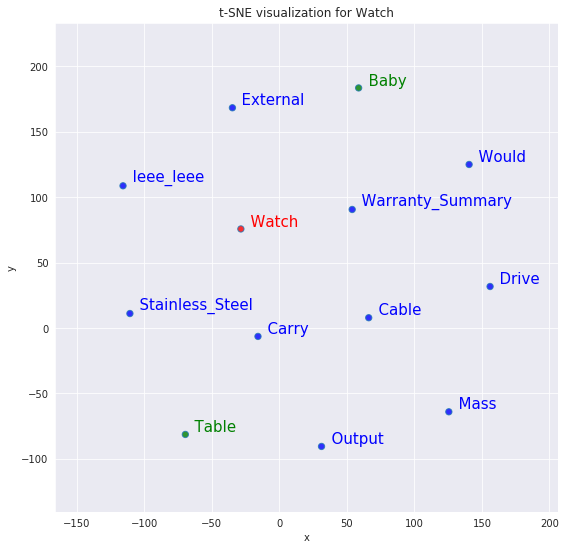

1:54: E231 missing whitespace after ','
INFO - 21:06:45: 1:54: E231 missing whitespace after ','


In [17]:
tsnescatterplot(w2v_model, 'watch', ['baby', 'table'],'before')

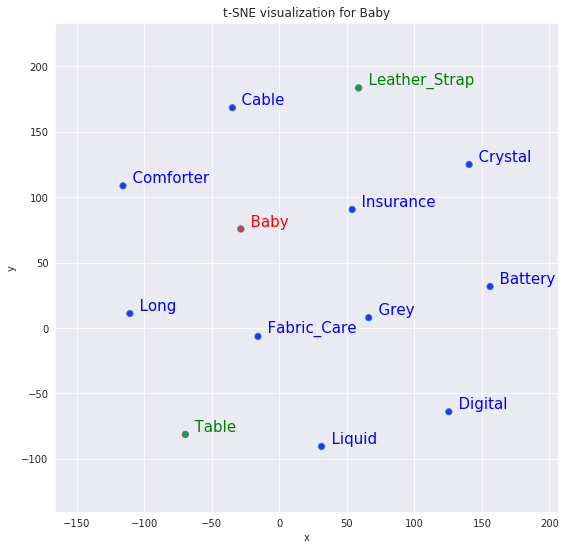

1:62: E231 missing whitespace after ','
INFO - 21:06:46: 1:62: E231 missing whitespace after ','


In [18]:
tsnescatterplot(w2v_model, 'baby', ['leather_strap', 'table'],'before')

###### 10 Most similar words vs. 10 Most dissimilar

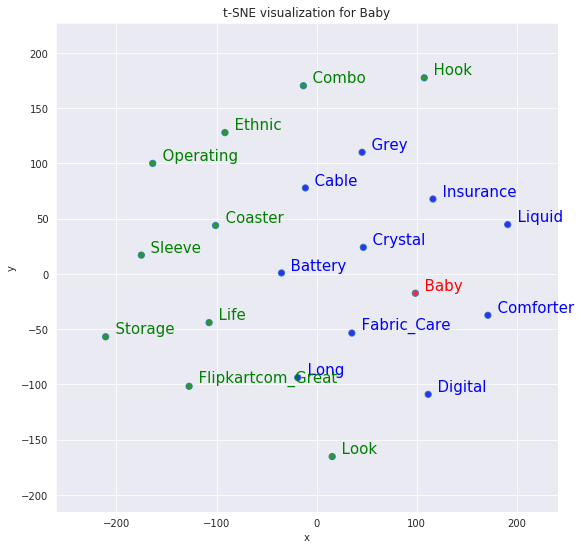

In [19]:
tsnescatterplot(w2v_model, 'baby', [i[0] for i in w2v_model.wv.most_similar(negative=["baby"])], 'before')

###### 10 Most similar words vs. 11th to 20th Most similar words

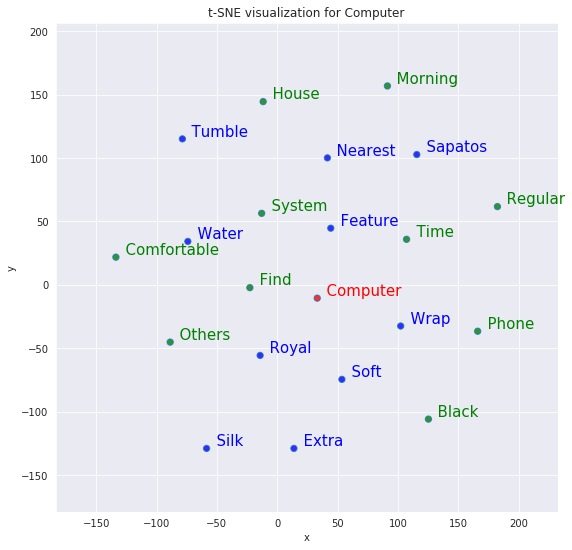

In [20]:
tsnescatterplot(w2v_model, "computer", [t[0] for t in w2v_model.wv.most_similar(positive=["computer"], topn=20)][10:], 'before')

### Training

In [21]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 21:06:47: training model with 3 workers on 703 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 21:06:47: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:47: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:47: worker thread finished; awaiting finish of 0 more threads
INFO - 21:06:47: EPOCH - 1 : training on 72080 raw words (11981 effective words) took 0.2s, 52767 effective words/s
INFO - 21:06:47: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:47: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:47: worker thread finished; awaiting finish of 0 more threads
INFO - 21:06:47: EPOCH - 2 : training on 72080 raw words (12009 effective words) took 0.2s, 53729 effective words/s
INFO - 21:06:47: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:47: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:47: worker thread fini

INFO - 21:06:51: EPOCH - 24 : training on 72080 raw words (12145 effective words) took 0.2s, 77507 effective words/s
INFO - 21:06:51: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:51: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:51: worker thread finished; awaiting finish of 0 more threads
INFO - 21:06:51: EPOCH - 25 : training on 72080 raw words (12120 effective words) took 0.2s, 75677 effective words/s
INFO - 21:06:52: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:52: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:52: worker thread finished; awaiting finish of 0 more threads
INFO - 21:06:52: EPOCH - 26 : training on 72080 raw words (12058 effective words) took 0.2s, 75935 effective words/s
INFO - 21:06:52: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:52: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:52: worker thread finished; awaiting

Time to train the model: 0.09 mins


In [22]:
w2v_model.init_sims(replace=True)

INFO - 21:06:52: precomputing L2-norms of word weight vectors


### Model exploration

###### Main categories

In [23]:
input_df['product_main_category'].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

###### Similarities

In [24]:
w2v_model.wv.most_similar(positive=["watch"])

[('leather_strap', 0.9939737915992737),
 ('sonata', 0.9936677813529968),
 ('perucci', 0.9910557270050049),
 ('timewel', 0.9907384514808655),
 ('digital', 0.9903551340103149),
 ('dial', 0.988773763179779),
 ('scratch_resistant', 0.988581657409668),
 ('strap', 0.9876195192337036),
 ('resistance', 0.9876093864440918),
 ('analog_watch', 0.9871499538421631)]

In [25]:
w2v_model.wv.most_similar(positive=["baby"])

[('striped', 0.9959699511528015),
 ('short', 0.9956984519958496),
 ('fabric', 0.9952200651168823),
 ('romper', 0.9951827526092529),
 ('regular', 0.994499921798706),
 ('sleeve_half', 0.9934049844741821),
 ('tshirt', 0.9929680228233337),
 ('gathered', 0.9926023483276367),
 ('legging', 0.9919477701187134),
 ('aline', 0.9911676049232483)]

In [26]:
w2v_model.wv.similarity("baby", 'diaper')

0.907925

In [27]:
w2v_model.wv.most_similar(positive=["watch"])

[('leather_strap', 0.9939737915992737),
 ('sonata', 0.9936677813529968),
 ('perucci', 0.9910557270050049),
 ('timewel', 0.9907384514808655),
 ('digital', 0.9903551340103149),
 ('dial', 0.988773763179779),
 ('scratch_resistant', 0.988581657409668),
 ('strap', 0.9876195192337036),
 ('resistance', 0.9876093864440918),
 ('analog_watch', 0.9871499538421631)]

In [28]:
w2v_model.wv.most_similar(positive=["computer"])

[('phone', 0.9903618097305298),
 ('keyboard', 0.989937961101532),
 ('device', 0.989434540271759),
 ('flexible', 0.9872123003005981),
 ('powered', 0.9833655953407288),
 ('android', 0.980296790599823),
 ('portable', 0.9801636934280396),
 ('screen', 0.9798862934112549),
 ('mobile', 0.9787423610687256),
 ('tube', 0.9772253632545471)]

In [29]:
input_df['product_main_category'].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

### After the training

###### 10 Most similar words vs. 2 random words

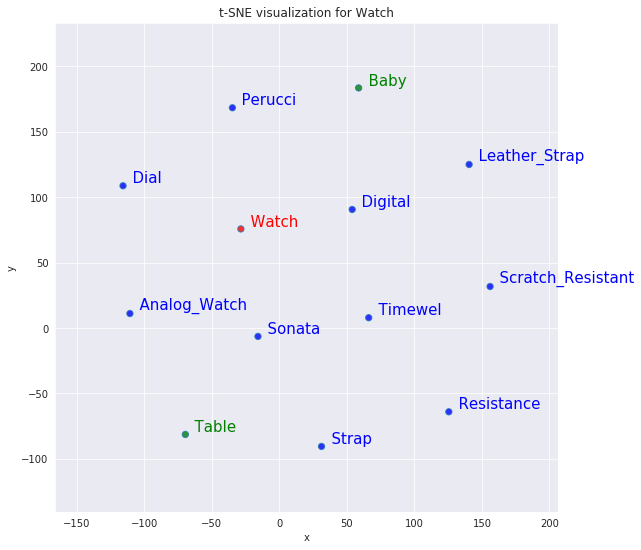

In [30]:
tsnescatterplot(w2v_model, 'watch', ['baby', 'table'], 'after')

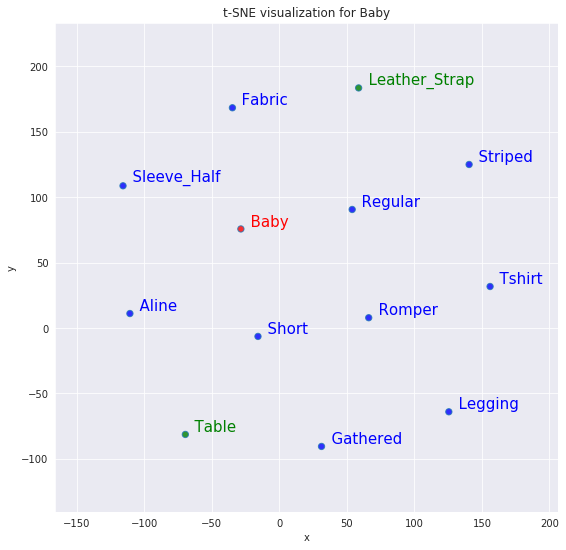

In [31]:
tsnescatterplot(w2v_model, 'baby', ['leather_strap', 'table'], 'after')

###### 10 Most similar words vs. 10 Most dissimilar

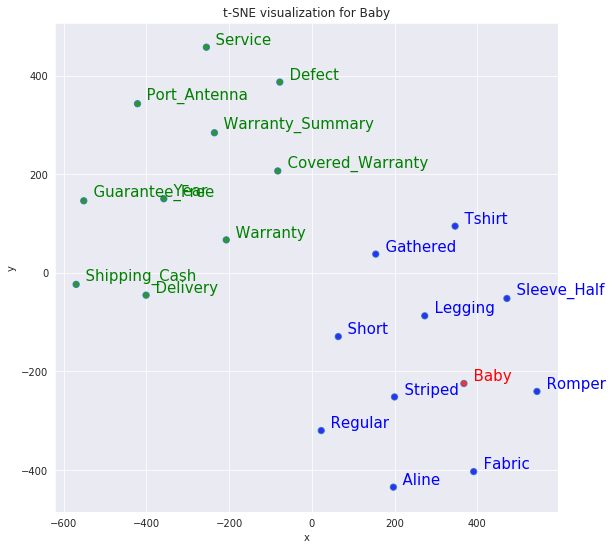

In [32]:
tsnescatterplot(w2v_model, 'baby', [i[0] for i in w2v_model.wv.most_similar(negative=["baby"])], 'after')

###### 10 Most similar words vs. 11th to 20th Most similar words

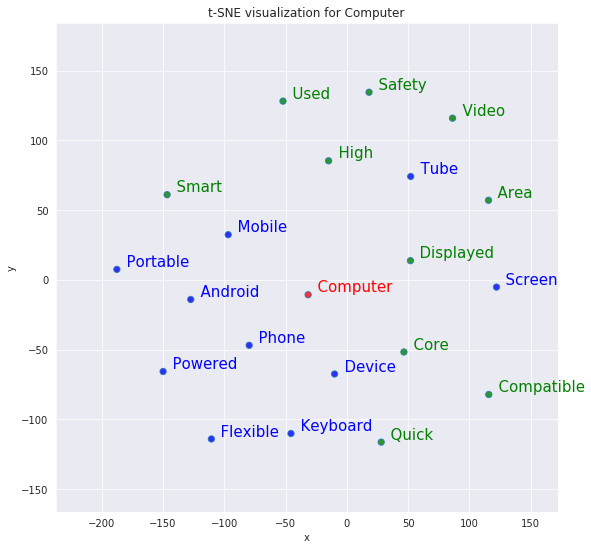

In [33]:
tsnescatterplot(w2v_model, "computer", [t[0] for t in w2v_model.wv.most_similar(positive=["computer"], topn=20)][10:], 'after')

In [34]:
w2v_model

### DocVect

In [35]:
wordslist

[['elegance',
  'brand',
  'elegance',
  'designed',
  'door',
  'type',
  'eyelet',
  'model',
  'name',
  'abstract',
  'polyester',
  'door',
  'curtain',
  'model',
  'duster',
  'color',
  'multicolor',
  'length',
  'number',
  'content',
  'sale',
  'package',
  'pack',
  'sale',
  'package',
  'curtain',
  'material',
  'polyester',
  'feature',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtainelegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'height',
  'pack',
  'price',
  'curtain',
  'enhances',
  'look',
  'interiorsthis',
  'curtain',
  'made',
  'high',
  'quality',
  'polyester',
  'fabricit',
  'feature',
  'eyelet',
  'style',
  'stitch',
  'metal',
  'ringit',
  'make',
  'room',
  'environment',
  'romantic',
  'lovingthis',
  'curtain',
  'wrinkle',
  'anti',
  'shrinkage',
  'elegant',
  'apparancegive',
  'home',
  'bright',
  'modernistic',
  'appeal',
 

In [36]:
category_id = list(input_df['product_main_category'])

In [37]:
description_def = list(input_df['clean_concat'])

In [38]:
# tagged_data = [TaggedDocument(words=word_tokenize(term_def.lower()), tags=[category_id[i]]) for i, term_def in enumerate(description_def)]

###### A number is assigned as a tag for each product description

In [39]:
tagged_data = [TaggedDocument(words=word_tokenize(term_def.lower()), tags=[str(i)]) for i, term_def in enumerate(description_def)]

###### A Doc2Vec model is initialised with distributed bag of words (PV-DBOW) as algorythm

In [40]:
my_vector_size = 100
d2v_model = Doc2Vec(vector_size=my_vector_size,
                    alpha=0.03,
                    min_alpha=0.00025,
                    min_count=20,
                    dm=0)

In [41]:
d2v_model.build_vocab(tagged_data)

INFO - 21:06:57: collecting all words and their counts
INFO - 21:06:57: PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
INFO - 21:06:57: collected 5501 word types and 1050 unique tags from a corpus of 1050 examples and 83859 words
INFO - 21:06:57: Loading a fresh vocabulary
INFO - 21:06:57: effective_min_count=20 retains 651 unique words (11% of original 5501, drops 4850)
INFO - 21:06:57: effective_min_count=20 leaves 66063 word corpus (78% of original 83859, drops 17796)
INFO - 21:06:57: deleting the raw counts dictionary of 5501 items
INFO - 21:06:57: sample=0.001 downsamples 89 most-common words
INFO - 21:06:57: downsampling leaves estimated 47958 word corpus (72.6% of prior 66063)
INFO - 21:06:57: estimated required memory for 651 words and 100 dimensions: 1476300 bytes
INFO - 21:06:57: resetting layer weights


###### Training of the model

In [42]:
epochs = range(my_vector_size)
for epoch in epochs:
    print(f'Epoch {epoch+1}')
    d2v_model.train(tagged_data,
                total_examples=d2v_model.corpus_count,
                epochs=d2v_model.epochs)
    # decrease the learning rate
    d2v_model.alpha -= 0.00025
    # fix the learning rate, no decay
    d2v_model.min_alpha = d2v_model.alpha  
d2v_model.save('math_lectures.model')

INFO - 21:06:57: training model with 3 workers on 651 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
INFO - 21:06:57: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:57: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:57: worker thread finished; awaiting finish of 0 more threads
INFO - 21:06:57: EPOCH - 1 : training on 83859 raw words (48929 effective words) took 0.1s, 331439 effective words/s


Epoch 1


INFO - 21:06:57: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:57: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:57: worker thread finished; awaiting finish of 0 more threads
INFO - 21:06:57: EPOCH - 2 : training on 83859 raw words (48878 effective words) took 0.1s, 427243 effective words/s
INFO - 21:06:58: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:58: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:58: worker thread finished; awaiting finish of 0 more threads
INFO - 21:06:58: EPOCH - 3 : training on 83859 raw words (48997 effective words) took 0.1s, 522733 effective words/s
INFO - 21:06:58: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:58: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:58: worker thread finished; awaiting finish of 0 more threads
INFO - 21:06:58: EPOCH - 4 : training on 83859 raw words (48936 effective words) took 0.1s,

Epoch 2


INFO - 21:06:58: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:58: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:58: worker thread finished; awaiting finish of 0 more threads
INFO - 21:06:58: EPOCH - 2 : training on 83859 raw words (49075 effective words) took 0.2s, 316393 effective words/s
INFO - 21:06:58: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:58: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:58: worker thread finished; awaiting finish of 0 more threads
INFO - 21:06:58: EPOCH - 3 : training on 83859 raw words (49065 effective words) took 0.2s, 298484 effective words/s
INFO - 21:06:58: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:59: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:59: worker thread finished; awaiting finish of 0 more threads
INFO - 21:06:59: EPOCH - 4 : training on 83859 raw words (48819 effective words) took 0.2s,

Epoch 3


INFO - 21:06:59: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:59: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:59: worker thread finished; awaiting finish of 0 more threads
INFO - 21:06:59: EPOCH - 1 : training on 83859 raw words (49015 effective words) took 0.2s, 204829 effective words/s
INFO - 21:06:59: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:59: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:59: worker thread finished; awaiting finish of 0 more threads
INFO - 21:06:59: EPOCH - 2 : training on 83859 raw words (48941 effective words) took 0.2s, 245922 effective words/s
INFO - 21:06:59: worker thread finished; awaiting finish of 2 more threads
INFO - 21:06:59: worker thread finished; awaiting finish of 1 more threads
INFO - 21:06:59: worker thread finished; awaiting finish of 0 more threads
INFO - 21:06:59: EPOCH - 3 : training on 83859 raw words (48953 effective words) took 0.2s,

Epoch 4


INFO - 21:07:00: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:00: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:00: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:00: EPOCH - 1 : training on 83859 raw words (48824 effective words) took 0.2s, 195304 effective words/s
INFO - 21:07:01: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:01: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:01: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:01: EPOCH - 2 : training on 83859 raw words (48953 effective words) took 0.3s, 180801 effective words/s
INFO - 21:07:01: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:01: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:01: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:01: EPOCH - 3 : training on 83859 raw words (49012 effective words) took 0.2s,

Epoch 5


INFO - 21:07:01: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:01: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:01: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:01: EPOCH - 2 : training on 83859 raw words (48981 effective words) took 0.1s, 362967 effective words/s
INFO - 21:07:02: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:02: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:02: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:02: EPOCH - 3 : training on 83859 raw words (48994 effective words) took 0.2s, 320259 effective words/s
INFO - 21:07:02: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:02: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:02: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:02: EPOCH - 4 : training on 83859 raw words (49086 effective words) took 0.2s,

Epoch 6


INFO - 21:07:02: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:02: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:02: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:02: EPOCH - 2 : training on 83859 raw words (48827 effective words) took 0.1s, 446051 effective words/s
INFO - 21:07:02: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:02: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:02: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:02: EPOCH - 3 : training on 83859 raw words (48930 effective words) took 0.1s, 538471 effective words/s
INFO - 21:07:02: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:02: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:02: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:02: EPOCH - 4 : training on 83859 raw words (49023 effective words) took 0.1s,

Epoch 7


INFO - 21:07:03: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:03: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:03: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:03: EPOCH - 2 : training on 83859 raw words (49002 effective words) took 0.1s, 342384 effective words/s
INFO - 21:07:03: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:03: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:03: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:03: EPOCH - 3 : training on 83859 raw words (48867 effective words) took 0.1s, 476430 effective words/s
INFO - 21:07:03: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:03: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:03: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:03: EPOCH - 4 : training on 83859 raw words (48967 effective words) took 0.1s,

Epoch 8


INFO - 21:07:03: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:03: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:03: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:03: EPOCH - 3 : training on 83859 raw words (48991 effective words) took 0.1s, 526520 effective words/s
INFO - 21:07:04: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:04: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:04: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:04: EPOCH - 4 : training on 83859 raw words (48958 effective words) took 0.1s, 411632 effective words/s
INFO - 21:07:04: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:04: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:04: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:04: EPOCH - 5 : training on 83859 raw words (49125 effective words) took 0.1s,

Epoch 9


INFO - 21:07:04: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:04: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:04: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:04: EPOCH - 2 : training on 83859 raw words (49069 effective words) took 0.1s, 421981 effective words/s
INFO - 21:07:04: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:04: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:04: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:04: EPOCH - 3 : training on 83859 raw words (49064 effective words) took 0.1s, 512907 effective words/s
INFO - 21:07:04: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:04: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:04: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:04: EPOCH - 4 : training on 83859 raw words (49121 effective words) took 0.1s,

Epoch 10


INFO - 21:07:04: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:04: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:04: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:04: EPOCH - 2 : training on 83859 raw words (48915 effective words) took 0.1s, 362207 effective words/s
INFO - 21:07:05: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:05: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:05: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:05: EPOCH - 3 : training on 83859 raw words (49087 effective words) took 0.1s, 494460 effective words/s
INFO - 21:07:05: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:05: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:05: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:05: EPOCH - 4 : training on 83859 raw words (49095 effective words) took 0.1s,

Epoch 11


INFO - 21:07:05: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:05: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:05: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:05: EPOCH - 3 : training on 83859 raw words (48927 effective words) took 0.1s, 574857 effective words/s
INFO - 21:07:05: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:05: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:05: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:05: EPOCH - 4 : training on 83859 raw words (48770 effective words) took 0.1s, 529601 effective words/s
INFO - 21:07:05: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:05: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:05: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:05: EPOCH - 5 : training on 83859 raw words (48950 effective words) took 0.1s,

Epoch 12


INFO - 21:07:05: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:05: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:05: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:05: EPOCH - 2 : training on 83859 raw words (49035 effective words) took 0.1s, 422567 effective words/s
INFO - 21:07:06: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:06: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:06: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:06: EPOCH - 3 : training on 83859 raw words (48768 effective words) took 0.1s, 491332 effective words/s
INFO - 21:07:06: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:06: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:06: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:06: EPOCH - 4 : training on 83859 raw words (49073 effective words) took 0.1s,

Epoch 13


INFO - 21:07:06: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:06: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:06: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:06: EPOCH - 2 : training on 83859 raw words (49280 effective words) took 0.1s, 462186 effective words/s
INFO - 21:07:06: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:06: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:06: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:06: EPOCH - 3 : training on 83859 raw words (48878 effective words) took 0.1s, 552144 effective words/s
INFO - 21:07:06: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:06: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:06: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:06: EPOCH - 4 : training on 83859 raw words (49118 effective words) took 0.1s,

Epoch 14


INFO - 21:07:07: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:07: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:07: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:07: EPOCH - 3 : training on 83859 raw words (49071 effective words) took 0.1s, 560696 effective words/s
INFO - 21:07:07: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:07: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:07: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:07: EPOCH - 4 : training on 83859 raw words (49020 effective words) took 0.1s, 395537 effective words/s
INFO - 21:07:07: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:07: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:07: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:07: EPOCH - 5 : training on 83859 raw words (49030 effective words) took 0.1s,

Epoch 15


INFO - 21:07:07: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:07: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:07: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:07: EPOCH - 2 : training on 83859 raw words (49111 effective words) took 0.1s, 404873 effective words/s
INFO - 21:07:07: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:07: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:07: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:07: EPOCH - 3 : training on 83859 raw words (49117 effective words) took 0.1s, 505651 effective words/s
INFO - 21:07:07: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:07: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:07: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:07: EPOCH - 4 : training on 83859 raw words (48981 effective words) took 0.1s,

Epoch 16


INFO - 21:07:08: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:08: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:08: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:08: EPOCH - 3 : training on 83859 raw words (49078 effective words) took 0.1s, 470189 effective words/s
INFO - 21:07:08: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:08: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:08: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:08: EPOCH - 4 : training on 83859 raw words (48890 effective words) took 0.1s, 514701 effective words/s
INFO - 21:07:08: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:08: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:08: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:08: EPOCH - 5 : training on 83859 raw words (49009 effective words) took 0.1s,

Epoch 17


INFO - 21:07:08: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:08: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:08: EPOCH - 2 : training on 83859 raw words (49157 effective words) took 0.1s, 415418 effective words/s
INFO - 21:07:08: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:08: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:08: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:08: EPOCH - 3 : training on 83859 raw words (48949 effective words) took 0.1s, 457120 effective words/s
INFO - 21:07:08: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:08: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:08: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:08: EPOCH - 4 : training on 83859 raw words (48907 effective words) took 0.1s, 509320 effective words/s
INFO - 21:07:08: worker thread finished; awaiting

Epoch 18


INFO - 21:07:09: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:09: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:09: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:09: EPOCH - 3 : training on 83859 raw words (49070 effective words) took 0.1s, 525218 effective words/s
INFO - 21:07:09: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:09: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:09: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:09: EPOCH - 4 : training on 83859 raw words (49251 effective words) took 0.2s, 327260 effective words/s
INFO - 21:07:09: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:09: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:09: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:09: EPOCH - 5 : training on 83859 raw words (48984 effective words) took 0.2s,

Epoch 19


INFO - 21:07:09: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:09: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:09: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:09: EPOCH - 2 : training on 83859 raw words (49071 effective words) took 0.1s, 392799 effective words/s
INFO - 21:07:09: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:09: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:09: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:09: EPOCH - 3 : training on 83859 raw words (48830 effective words) took 0.1s, 392936 effective words/s
INFO - 21:07:10: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:10: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:10: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:10: EPOCH - 4 : training on 83859 raw words (48916 effective words) took 0.2s,

Epoch 20


INFO - 21:07:10: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:10: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:10: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:10: EPOCH - 2 : training on 83859 raw words (49114 effective words) took 0.2s, 308144 effective words/s
INFO - 21:07:10: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:10: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:10: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:10: EPOCH - 3 : training on 83859 raw words (48893 effective words) took 0.2s, 197144 effective words/s
INFO - 21:07:10: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:10: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:10: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:10: EPOCH - 4 : training on 83859 raw words (48939 effective words) took 0.2s,

Epoch 21


INFO - 21:07:11: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:11: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:11: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:11: EPOCH - 2 : training on 83859 raw words (49144 effective words) took 0.2s, 317473 effective words/s
INFO - 21:07:11: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:11: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:11: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:11: EPOCH - 3 : training on 83859 raw words (48996 effective words) took 0.2s, 308863 effective words/s
INFO - 21:07:11: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:11: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:11: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:11: EPOCH - 4 : training on 83859 raw words (49104 effective words) took 0.1s,

Epoch 22


INFO - 21:07:12: EPOCH - 2 : training on 83859 raw words (49042 effective words) took 0.1s, 532866 effective words/s
INFO - 21:07:12: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:12: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:12: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:12: EPOCH - 3 : training on 83859 raw words (48949 effective words) took 0.1s, 571576 effective words/s
INFO - 21:07:12: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:12: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:12: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:12: EPOCH - 4 : training on 83859 raw words (49152 effective words) took 0.1s, 452759 effective words/s
INFO - 21:07:12: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:12: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:12: worker thread finished; awaiting

Epoch 23


INFO - 21:07:12: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:12: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:12: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:12: EPOCH - 3 : training on 83859 raw words (49087 effective words) took 0.1s, 549377 effective words/s
INFO - 21:07:12: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:12: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:12: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:12: EPOCH - 4 : training on 83859 raw words (49170 effective words) took 0.1s, 506309 effective words/s
INFO - 21:07:12: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:12: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:12: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:12: EPOCH - 5 : training on 83859 raw words (49123 effective words) took 0.1s,

Epoch 24


INFO - 21:07:13: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:13: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:13: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:13: EPOCH - 3 : training on 83859 raw words (49001 effective words) took 0.1s, 522035 effective words/s
INFO - 21:07:13: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:13: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:13: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:13: EPOCH - 4 : training on 83859 raw words (48935 effective words) took 0.1s, 520806 effective words/s
INFO - 21:07:13: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:13: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:13: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:13: EPOCH - 5 : training on 83859 raw words (49082 effective words) took 0.1s,

Epoch 25


INFO - 21:07:13: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:13: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:13: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:13: EPOCH - 2 : training on 83859 raw words (49136 effective words) took 0.1s, 532406 effective words/s
INFO - 21:07:13: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:13: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:13: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:13: EPOCH - 3 : training on 83859 raw words (49036 effective words) took 0.1s, 556478 effective words/s
INFO - 21:07:13: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:13: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:13: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:13: EPOCH - 4 : training on 83859 raw words (49080 effective words) took 0.1s,

Epoch 26


INFO - 21:07:14: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:14: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:14: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:14: EPOCH - 2 : training on 83859 raw words (48957 effective words) took 0.1s, 450603 effective words/s
INFO - 21:07:14: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:14: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:14: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:14: EPOCH - 3 : training on 83859 raw words (48939 effective words) took 0.1s, 554312 effective words/s
INFO - 21:07:14: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:14: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:14: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:14: EPOCH - 4 : training on 83859 raw words (49021 effective words) took 0.1s,

Epoch 27


INFO - 21:07:14: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:14: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:14: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:14: EPOCH - 2 : training on 83859 raw words (49180 effective words) took 0.1s, 548087 effective words/s
INFO - 21:07:14: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:14: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:14: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:14: EPOCH - 3 : training on 83859 raw words (49067 effective words) took 0.1s, 524011 effective words/s
INFO - 21:07:14: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:14: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:14: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:14: EPOCH - 4 : training on 83859 raw words (48827 effective words) took 0.1s,

Epoch 28


INFO - 21:07:15: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:15: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:15: EPOCH - 2 : training on 83859 raw words (48970 effective words) took 0.1s, 474338 effective words/s
INFO - 21:07:15: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:15: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:15: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:15: EPOCH - 3 : training on 83859 raw words (49066 effective words) took 0.1s, 551105 effective words/s
INFO - 21:07:15: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:15: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:15: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:15: EPOCH - 4 : training on 83859 raw words (49077 effective words) took 0.1s, 568929 effective words/s
INFO - 21:07:15: worker thread finished; awaiting

Epoch 29


INFO - 21:07:15: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:15: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:15: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:15: EPOCH - 3 : training on 83859 raw words (48947 effective words) took 0.1s, 549135 effective words/s
INFO - 21:07:15: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:15: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:15: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:15: EPOCH - 4 : training on 83859 raw words (49001 effective words) took 0.1s, 505099 effective words/s
INFO - 21:07:15: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:15: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:15: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:15: EPOCH - 5 : training on 83859 raw words (49086 effective words) took 0.1s,

Epoch 30


INFO - 21:07:16: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:16: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:16: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:16: EPOCH - 3 : training on 83859 raw words (49028 effective words) took 0.1s, 434632 effective words/s
INFO - 21:07:16: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:16: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:16: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:16: EPOCH - 4 : training on 83859 raw words (48977 effective words) took 0.1s, 538472 effective words/s
INFO - 21:07:16: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:16: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:16: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:16: EPOCH - 5 : training on 83859 raw words (49050 effective words) took 0.1s,

Epoch 31


INFO - 21:07:16: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:16: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:16: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:16: EPOCH - 3 : training on 83859 raw words (49143 effective words) took 0.1s, 392753 effective words/s
INFO - 21:07:16: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:16: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:16: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:16: EPOCH - 4 : training on 83859 raw words (48946 effective words) took 0.1s, 439283 effective words/s
INFO - 21:07:16: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:16: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:16: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:16: EPOCH - 5 : training on 83859 raw words (49161 effective words) took 0.1s,

Epoch 32


INFO - 21:07:17: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:17: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:17: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:17: EPOCH - 3 : training on 83859 raw words (48807 effective words) took 0.1s, 441135 effective words/s
INFO - 21:07:17: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:17: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:17: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:17: EPOCH - 4 : training on 83859 raw words (49168 effective words) took 0.1s, 541801 effective words/s
INFO - 21:07:17: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:17: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:17: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:17: EPOCH - 5 : training on 83859 raw words (48974 effective words) took 0.1s,

Epoch 33


INFO - 21:07:17: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:17: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:17: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:17: EPOCH - 3 : training on 83859 raw words (48985 effective words) took 0.1s, 530047 effective words/s
INFO - 21:07:17: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:17: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:17: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:17: EPOCH - 4 : training on 83859 raw words (49043 effective words) took 0.1s, 582531 effective words/s
INFO - 21:07:17: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:17: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:17: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:17: EPOCH - 5 : training on 83859 raw words (48988 effective words) took 0.1s,

Epoch 34


INFO - 21:07:18: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:18: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:18: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:18: EPOCH - 3 : training on 83859 raw words (48960 effective words) took 0.1s, 545349 effective words/s
INFO - 21:07:18: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:18: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:18: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:18: EPOCH - 4 : training on 83859 raw words (48873 effective words) took 0.1s, 458298 effective words/s
INFO - 21:07:18: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:18: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:18: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:18: EPOCH - 5 : training on 83859 raw words (48954 effective words) took 0.1s,

Epoch 35


INFO - 21:07:18: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:18: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:18: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:18: EPOCH - 3 : training on 83859 raw words (48949 effective words) took 0.1s, 494467 effective words/s
INFO - 21:07:18: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:18: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:18: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:18: EPOCH - 4 : training on 83859 raw words (48989 effective words) took 0.1s, 540568 effective words/s
INFO - 21:07:18: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:18: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:18: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:18: EPOCH - 5 : training on 83859 raw words (49144 effective words) took 0.1s,

Epoch 36


INFO - 21:07:18: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:18: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:18: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:18: EPOCH - 2 : training on 83859 raw words (49030 effective words) took 0.1s, 461942 effective words/s
INFO - 21:07:19: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:19: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:19: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:19: EPOCH - 3 : training on 83859 raw words (48971 effective words) took 0.1s, 512768 effective words/s
INFO - 21:07:19: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:19: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:19: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:19: EPOCH - 4 : training on 83859 raw words (49164 effective words) took 0.1s,

Epoch 37


INFO - 21:07:19: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:19: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:19: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:19: EPOCH - 2 : training on 83859 raw words (48933 effective words) took 0.1s, 470548 effective words/s
INFO - 21:07:19: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:19: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:19: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:19: EPOCH - 3 : training on 83859 raw words (49086 effective words) took 0.1s, 569061 effective words/s
INFO - 21:07:19: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:19: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:19: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:19: EPOCH - 4 : training on 83859 raw words (48932 effective words) took 0.1s,

Epoch 38


INFO - 21:07:20: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:20: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:20: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:20: EPOCH - 2 : training on 83859 raw words (49020 effective words) took 0.1s, 455922 effective words/s
INFO - 21:07:20: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:20: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:20: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:20: EPOCH - 3 : training on 83859 raw words (49031 effective words) took 0.1s, 364832 effective words/s
INFO - 21:07:20: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:20: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:20: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:20: EPOCH - 4 : training on 83859 raw words (48992 effective words) took 0.1s,

Epoch 39


INFO - 21:07:20: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:20: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:20: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:20: EPOCH - 3 : training on 83859 raw words (48981 effective words) took 0.1s, 519914 effective words/s
INFO - 21:07:20: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:20: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:20: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:20: EPOCH - 4 : training on 83859 raw words (49049 effective words) took 0.1s, 572184 effective words/s
INFO - 21:07:20: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:20: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:20: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:20: EPOCH - 5 : training on 83859 raw words (49003 effective words) took 0.1s,

Epoch 40


INFO - 21:07:21: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:21: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:21: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:21: EPOCH - 2 : training on 83859 raw words (49095 effective words) took 0.1s, 369031 effective words/s
INFO - 21:07:21: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:21: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:21: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:21: EPOCH - 3 : training on 83859 raw words (49029 effective words) took 0.1s, 461481 effective words/s
INFO - 21:07:21: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:21: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:21: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:21: EPOCH - 4 : training on 83859 raw words (48936 effective words) took 0.1s,

Epoch 41


INFO - 21:07:21: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:21: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:21: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:21: EPOCH - 3 : training on 83859 raw words (48993 effective words) took 0.1s, 530421 effective words/s
INFO - 21:07:21: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:21: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:21: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:21: EPOCH - 4 : training on 83859 raw words (48897 effective words) took 0.1s, 540696 effective words/s
INFO - 21:07:22: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:22: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:22: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:22: EPOCH - 5 : training on 83859 raw words (49036 effective words) took 0.1s,

Epoch 42


INFO - 21:07:22: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:22: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:22: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:22: EPOCH - 3 : training on 83859 raw words (49042 effective words) took 0.1s, 503798 effective words/s
INFO - 21:07:22: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:22: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:22: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:22: EPOCH - 4 : training on 83859 raw words (49015 effective words) took 0.2s, 295449 effective words/s
INFO - 21:07:22: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:22: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:22: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:22: EPOCH - 5 : training on 83859 raw words (49098 effective words) took 0.1s,

Epoch 43


INFO - 21:07:22: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:22: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:22: EPOCH - 2 : training on 83859 raw words (49051 effective words) took 0.1s, 426576 effective words/s
INFO - 21:07:22: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:22: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:22: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:22: EPOCH - 3 : training on 83859 raw words (48890 effective words) took 0.1s, 354453 effective words/s
INFO - 21:07:23: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:23: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:23: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:23: EPOCH - 4 : training on 83859 raw words (48936 effective words) took 0.1s, 550573 effective words/s
INFO - 21:07:23: worker thread finished; awaiting

Epoch 44


INFO - 21:07:23: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:23: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:23: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:23: EPOCH - 3 : training on 83859 raw words (48798 effective words) took 0.1s, 557075 effective words/s
INFO - 21:07:23: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:23: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:23: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:23: EPOCH - 4 : training on 83859 raw words (49078 effective words) took 0.1s, 470112 effective words/s
INFO - 21:07:23: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:23: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:23: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:23: EPOCH - 5 : training on 83859 raw words (48981 effective words) took 0.1s,

Epoch 45


INFO - 21:07:23: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:23: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:23: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:23: EPOCH - 2 : training on 83859 raw words (49305 effective words) took 0.1s, 397371 effective words/s
INFO - 21:07:23: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:23: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:23: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:23: EPOCH - 3 : training on 83859 raw words (48810 effective words) took 0.1s, 490853 effective words/s
INFO - 21:07:24: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:24: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:24: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:24: EPOCH - 4 : training on 83859 raw words (48884 effective words) took 0.1s,

Epoch 46


INFO - 21:07:24: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:24: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:24: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:24: EPOCH - 2 : training on 83859 raw words (49003 effective words) took 0.1s, 510769 effective words/s
INFO - 21:07:24: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:24: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:24: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:24: EPOCH - 3 : training on 83859 raw words (48912 effective words) took 0.1s, 423661 effective words/s
INFO - 21:07:24: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:24: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:24: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:24: EPOCH - 4 : training on 83859 raw words (48953 effective words) took 0.1s,

Epoch 47


INFO - 21:07:25: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:25: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:25: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:25: EPOCH - 3 : training on 83859 raw words (48902 effective words) took 0.1s, 527437 effective words/s
INFO - 21:07:25: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:25: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:25: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:25: EPOCH - 4 : training on 83859 raw words (48953 effective words) took 0.1s, 566116 effective words/s
INFO - 21:07:25: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:25: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:25: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:25: EPOCH - 5 : training on 83859 raw words (48875 effective words) took 0.1s,

Epoch 48


INFO - 21:07:25: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:25: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:25: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:25: EPOCH - 3 : training on 83859 raw words (49125 effective words) took 0.1s, 538259 effective words/s
INFO - 21:07:25: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:25: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:25: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:25: EPOCH - 4 : training on 83859 raw words (48945 effective words) took 0.1s, 396166 effective words/s
INFO - 21:07:25: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:25: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:25: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:25: EPOCH - 5 : training on 83859 raw words (48865 effective words) took 0.1s,

Epoch 49


INFO - 21:07:26: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:26: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:26: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:26: EPOCH - 3 : training on 83859 raw words (48941 effective words) took 0.1s, 561632 effective words/s
INFO - 21:07:26: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:26: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:26: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:26: EPOCH - 4 : training on 83859 raw words (49012 effective words) took 0.1s, 535189 effective words/s
INFO - 21:07:26: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:26: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:26: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:26: EPOCH - 5 : training on 83859 raw words (49018 effective words) took 0.1s,

Epoch 50


INFO - 21:07:26: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:26: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:26: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:26: EPOCH - 3 : training on 83859 raw words (49013 effective words) took 0.1s, 495076 effective words/s
INFO - 21:07:26: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:26: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:26: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:26: EPOCH - 4 : training on 83859 raw words (49035 effective words) took 0.1s, 450799 effective words/s
INFO - 21:07:26: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:26: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:26: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:26: EPOCH - 5 : training on 83859 raw words (48890 effective words) took 0.1s,

Epoch 51


INFO - 21:07:27: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:27: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:27: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:27: EPOCH - 3 : training on 83859 raw words (49029 effective words) took 0.1s, 556853 effective words/s
INFO - 21:07:27: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:27: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:27: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:27: EPOCH - 4 : training on 83859 raw words (49147 effective words) took 0.1s, 550418 effective words/s
INFO - 21:07:27: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:27: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:27: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:27: EPOCH - 5 : training on 83859 raw words (48985 effective words) took 0.1s,

Epoch 52


INFO - 21:07:27: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:27: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:27: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:27: EPOCH - 3 : training on 83859 raw words (48918 effective words) took 0.1s, 573814 effective words/s
INFO - 21:07:27: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:27: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:27: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:27: EPOCH - 4 : training on 83859 raw words (48946 effective words) took 0.1s, 553361 effective words/s
INFO - 21:07:27: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:27: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:27: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:27: EPOCH - 5 : training on 83859 raw words (48951 effective words) took 0.1s,

Epoch 53


INFO - 21:07:27: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:27: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:27: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:28: EPOCH - 2 : training on 83859 raw words (48997 effective words) took 0.1s, 484500 effective words/s
INFO - 21:07:28: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:28: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:28: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:28: EPOCH - 3 : training on 83859 raw words (49005 effective words) took 0.1s, 452356 effective words/s
INFO - 21:07:28: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:28: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:28: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:28: EPOCH - 4 : training on 83859 raw words (48977 effective words) took 0.1s,

Epoch 54


INFO - 21:07:28: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:28: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:28: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:28: EPOCH - 2 : training on 83859 raw words (49046 effective words) took 0.1s, 373454 effective words/s
INFO - 21:07:28: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:28: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:28: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:28: EPOCH - 3 : training on 83859 raw words (49059 effective words) took 0.1s, 434216 effective words/s
INFO - 21:07:28: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:28: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:28: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:28: EPOCH - 4 : training on 83859 raw words (48959 effective words) took 0.1s,

Epoch 55


INFO - 21:07:29: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:29: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:29: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:29: EPOCH - 2 : training on 83859 raw words (49096 effective words) took 0.1s, 545665 effective words/s
INFO - 21:07:29: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:29: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:29: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:29: EPOCH - 3 : training on 83859 raw words (49054 effective words) took 0.1s, 487016 effective words/s
INFO - 21:07:29: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:29: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:29: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:29: EPOCH - 4 : training on 83859 raw words (49016 effective words) took 0.1s,

Epoch 56


INFO - 21:07:29: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:29: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:29: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:29: EPOCH - 2 : training on 83859 raw words (49181 effective words) took 0.1s, 454251 effective words/s
INFO - 21:07:29: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:29: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:29: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:29: EPOCH - 3 : training on 83859 raw words (48967 effective words) took 0.1s, 462275 effective words/s
INFO - 21:07:29: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:29: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:29: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:29: EPOCH - 4 : training on 83859 raw words (48877 effective words) took 0.1s,

Epoch 57


INFO - 21:07:30: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:30: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:30: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:30: EPOCH - 2 : training on 83859 raw words (49025 effective words) took 0.1s, 449164 effective words/s
INFO - 21:07:30: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:30: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:30: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:30: EPOCH - 3 : training on 83859 raw words (48979 effective words) took 0.1s, 389060 effective words/s
INFO - 21:07:30: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:30: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:30: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:30: EPOCH - 4 : training on 83859 raw words (48939 effective words) took 0.1s,

Epoch 58


INFO - 21:07:30: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:30: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:30: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:30: EPOCH - 2 : training on 83859 raw words (49097 effective words) took 0.1s, 473584 effective words/s
INFO - 21:07:30: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:30: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:30: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:30: EPOCH - 3 : training on 83859 raw words (49002 effective words) took 0.1s, 432760 effective words/s
INFO - 21:07:31: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:31: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:31: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:31: EPOCH - 4 : training on 83859 raw words (48978 effective words) took 0.1s,

Epoch 59


INFO - 21:07:31: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:31: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:31: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:31: EPOCH - 2 : training on 83859 raw words (49063 effective words) took 0.2s, 259003 effective words/s
INFO - 21:07:31: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:31: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:31: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:31: EPOCH - 3 : training on 83859 raw words (48796 effective words) took 0.2s, 276795 effective words/s
INFO - 21:07:31: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:31: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:31: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:31: EPOCH - 4 : training on 83859 raw words (49063 effective words) took 0.1s,

Epoch 60


INFO - 21:07:32: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:32: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:32: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:32: EPOCH - 2 : training on 83859 raw words (49027 effective words) took 0.2s, 300017 effective words/s
INFO - 21:07:32: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:32: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:32: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:32: EPOCH - 3 : training on 83859 raw words (48943 effective words) took 0.2s, 241780 effective words/s
INFO - 21:07:32: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:32: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:32: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:32: EPOCH - 4 : training on 83859 raw words (48908 effective words) took 0.2s,

Epoch 61


INFO - 21:07:33: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:33: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:33: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:33: EPOCH - 2 : training on 83859 raw words (49069 effective words) took 0.1s, 359487 effective words/s
INFO - 21:07:33: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:33: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:33: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:33: EPOCH - 3 : training on 83859 raw words (49168 effective words) took 0.1s, 402953 effective words/s
INFO - 21:07:33: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:33: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:33: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:33: EPOCH - 4 : training on 83859 raw words (48925 effective words) took 0.1s,

Epoch 62


INFO - 21:07:33: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:33: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:33: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:33: EPOCH - 2 : training on 83859 raw words (49151 effective words) took 0.1s, 519375 effective words/s
INFO - 21:07:33: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:33: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:33: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:33: EPOCH - 3 : training on 83859 raw words (48877 effective words) took 0.1s, 511465 effective words/s
INFO - 21:07:34: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:34: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:34: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:34: EPOCH - 4 : training on 83859 raw words (48997 effective words) took 0.1s,

Epoch 63


INFO - 21:07:34: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:34: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:34: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:34: EPOCH - 2 : training on 83859 raw words (48990 effective words) took 0.1s, 336865 effective words/s
INFO - 21:07:34: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:34: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:34: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:34: EPOCH - 3 : training on 83859 raw words (49121 effective words) took 0.1s, 399107 effective words/s
INFO - 21:07:34: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:34: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:34: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:34: EPOCH - 4 : training on 83859 raw words (48904 effective words) took 0.1s,

Epoch 64


INFO - 21:07:35: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:35: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:35: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:35: EPOCH - 3 : training on 83859 raw words (49158 effective words) took 0.1s, 444466 effective words/s
INFO - 21:07:35: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:35: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:35: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:35: EPOCH - 4 : training on 83859 raw words (49069 effective words) took 0.1s, 470416 effective words/s
INFO - 21:07:35: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:35: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:35: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:35: EPOCH - 5 : training on 83859 raw words (49102 effective words) took 0.1s,

Epoch 65


INFO - 21:07:35: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:35: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:35: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:35: EPOCH - 3 : training on 83859 raw words (49133 effective words) took 0.1s, 528801 effective words/s
INFO - 21:07:35: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:35: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:35: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:35: EPOCH - 4 : training on 83859 raw words (48916 effective words) took 0.1s, 559231 effective words/s
INFO - 21:07:35: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:35: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:35: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:35: EPOCH - 5 : training on 83859 raw words (49055 effective words) took 0.1s,

Epoch 66


INFO - 21:07:36: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:36: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:36: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:36: EPOCH - 3 : training on 83859 raw words (49040 effective words) took 0.1s, 481114 effective words/s
INFO - 21:07:36: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:36: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:36: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:36: EPOCH - 4 : training on 83859 raw words (48970 effective words) took 0.1s, 564836 effective words/s
INFO - 21:07:36: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:36: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:36: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:36: EPOCH - 5 : training on 83859 raw words (48894 effective words) took 0.1s,

Epoch 67


INFO - 21:07:36: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:36: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:36: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:36: EPOCH - 2 : training on 83859 raw words (48867 effective words) took 0.1s, 528677 effective words/s
INFO - 21:07:36: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:36: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:36: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:36: EPOCH - 3 : training on 83859 raw words (49067 effective words) took 0.1s, 444736 effective words/s
INFO - 21:07:36: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:36: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:36: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:36: EPOCH - 4 : training on 83859 raw words (48955 effective words) took 0.1s,

Epoch 68


INFO - 21:07:37: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:37: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:37: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:37: EPOCH - 3 : training on 83859 raw words (48969 effective words) took 0.1s, 547155 effective words/s
INFO - 21:07:37: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:37: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:37: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:37: EPOCH - 4 : training on 83859 raw words (49024 effective words) took 0.1s, 565168 effective words/s
INFO - 21:07:37: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:37: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:37: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:37: EPOCH - 5 : training on 83859 raw words (49071 effective words) took 0.1s,

Epoch 69


INFO - 21:07:37: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:37: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:37: EPOCH - 2 : training on 83859 raw words (49034 effective words) took 0.1s, 535825 effective words/s
INFO - 21:07:37: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:37: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:37: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:37: EPOCH - 3 : training on 83859 raw words (49031 effective words) took 0.1s, 565104 effective words/s
INFO - 21:07:37: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:37: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:37: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:37: EPOCH - 4 : training on 83859 raw words (49156 effective words) took 0.1s, 538912 effective words/s
INFO - 21:07:37: worker thread finished; awaiting

Epoch 70


INFO - 21:07:38: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:38: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:38: EPOCH - 2 : training on 83859 raw words (49032 effective words) took 0.1s, 452805 effective words/s
INFO - 21:07:38: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:38: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:38: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:38: EPOCH - 3 : training on 83859 raw words (49060 effective words) took 0.1s, 545900 effective words/s
INFO - 21:07:38: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:38: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:38: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:38: EPOCH - 4 : training on 83859 raw words (49087 effective words) took 0.1s, 588769 effective words/s
INFO - 21:07:38: worker thread finished; awaiting

Epoch 71


INFO - 21:07:38: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:38: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:38: EPOCH - 2 : training on 83859 raw words (49147 effective words) took 0.1s, 440051 effective words/s
INFO - 21:07:38: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:38: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:38: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:38: EPOCH - 3 : training on 83859 raw words (48950 effective words) took 0.1s, 517514 effective words/s
INFO - 21:07:38: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:38: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:38: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:38: EPOCH - 4 : training on 83859 raw words (49013 effective words) took 0.1s, 572225 effective words/s
INFO - 21:07:38: worker thread finished; awaiting

Epoch 72


INFO - 21:07:39: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:39: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:39: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:39: EPOCH - 3 : training on 83859 raw words (49012 effective words) took 0.1s, 553339 effective words/s
INFO - 21:07:39: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:39: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:39: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:39: EPOCH - 4 : training on 83859 raw words (49015 effective words) took 0.1s, 533755 effective words/s
INFO - 21:07:39: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:39: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:39: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:39: EPOCH - 5 : training on 83859 raw words (48920 effective words) took 0.1s,

Epoch 73


INFO - 21:07:39: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:39: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:39: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:39: EPOCH - 3 : training on 83859 raw words (49001 effective words) took 0.1s, 491998 effective words/s
INFO - 21:07:39: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:39: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:39: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:39: EPOCH - 4 : training on 83859 raw words (48810 effective words) took 0.1s, 423455 effective words/s
INFO - 21:07:39: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:39: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:39: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:39: EPOCH - 5 : training on 83859 raw words (49083 effective words) took 0.1s,

Epoch 74


INFO - 21:07:40: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:40: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:40: EPOCH - 2 : training on 83859 raw words (48890 effective words) took 0.1s, 537607 effective words/s
INFO - 21:07:40: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:40: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:40: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:40: EPOCH - 3 : training on 83859 raw words (49076 effective words) took 0.1s, 515928 effective words/s
INFO - 21:07:40: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:40: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:40: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:40: EPOCH - 4 : training on 83859 raw words (48875 effective words) took 0.1s, 548294 effective words/s
INFO - 21:07:40: worker thread finished; awaiting

Epoch 75


INFO - 21:07:40: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:40: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:40: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:40: EPOCH - 2 : training on 83859 raw words (49094 effective words) took 0.1s, 439940 effective words/s
INFO - 21:07:40: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:40: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:40: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:40: EPOCH - 3 : training on 83859 raw words (48907 effective words) took 0.1s, 422928 effective words/s
INFO - 21:07:40: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:40: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:40: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:40: EPOCH - 4 : training on 83859 raw words (49005 effective words) took 0.1s,

Epoch 76


INFO - 21:07:41: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:41: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:41: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:41: EPOCH - 3 : training on 83859 raw words (49011 effective words) took 0.1s, 571847 effective words/s
INFO - 21:07:41: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:41: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:41: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:41: EPOCH - 4 : training on 83859 raw words (49144 effective words) took 0.1s, 506856 effective words/s
INFO - 21:07:41: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:41: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:41: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:41: EPOCH - 5 : training on 83859 raw words (49043 effective words) took 0.1s,

Epoch 77


INFO - 21:07:41: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:41: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:41: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:41: EPOCH - 3 : training on 83859 raw words (49010 effective words) took 0.1s, 478691 effective words/s
INFO - 21:07:41: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:41: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:41: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:41: EPOCH - 4 : training on 83859 raw words (49079 effective words) took 0.1s, 464741 effective words/s
INFO - 21:07:41: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:41: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:41: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:41: EPOCH - 5 : training on 83859 raw words (49142 effective words) took 0.1s,

Epoch 78


INFO - 21:07:42: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:42: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:42: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:42: EPOCH - 3 : training on 83859 raw words (48820 effective words) took 0.1s, 525151 effective words/s
INFO - 21:07:42: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:42: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:42: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:42: EPOCH - 4 : training on 83859 raw words (49036 effective words) took 0.1s, 592655 effective words/s
INFO - 21:07:42: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:42: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:42: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:42: EPOCH - 5 : training on 83859 raw words (49121 effective words) took 0.1s,

Epoch 79


INFO - 21:07:42: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:42: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:42: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:42: EPOCH - 2 : training on 83859 raw words (48874 effective words) took 0.1s, 389957 effective words/s
INFO - 21:07:42: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:42: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:42: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:42: EPOCH - 3 : training on 83859 raw words (48863 effective words) took 0.1s, 505053 effective words/s
INFO - 21:07:42: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:42: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:42: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:42: EPOCH - 4 : training on 83859 raw words (49035 effective words) took 0.1s,

Epoch 80


INFO - 21:07:43: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:43: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:43: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:43: EPOCH - 3 : training on 83859 raw words (49299 effective words) took 0.1s, 528083 effective words/s
INFO - 21:07:43: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:43: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:43: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:43: EPOCH - 4 : training on 83859 raw words (49101 effective words) took 0.1s, 519215 effective words/s
INFO - 21:07:43: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:43: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:43: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:43: EPOCH - 5 : training on 83859 raw words (48747 effective words) took 0.1s,

Epoch 81


INFO - 21:07:43: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:43: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:43: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:43: EPOCH - 3 : training on 83859 raw words (49019 effective words) took 0.1s, 509921 effective words/s
INFO - 21:07:43: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:43: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:43: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:43: EPOCH - 4 : training on 83859 raw words (49028 effective words) took 0.1s, 519079 effective words/s
INFO - 21:07:43: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:43: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:43: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:43: EPOCH - 5 : training on 83859 raw words (49008 effective words) took 0.1s,

Epoch 82


INFO - 21:07:44: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:44: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:44: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:44: EPOCH - 3 : training on 83859 raw words (48914 effective words) took 0.1s, 359184 effective words/s
INFO - 21:07:44: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:44: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:44: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:44: EPOCH - 4 : training on 83859 raw words (48979 effective words) took 0.1s, 497940 effective words/s
INFO - 21:07:44: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:44: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:44: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:44: EPOCH - 5 : training on 83859 raw words (48992 effective words) took 0.1s,

Epoch 83


INFO - 21:07:44: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:44: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:44: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:44: EPOCH - 3 : training on 83859 raw words (49056 effective words) took 0.1s, 448616 effective words/s
INFO - 21:07:44: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:44: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:44: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:44: EPOCH - 4 : training on 83859 raw words (48973 effective words) took 0.1s, 451509 effective words/s
INFO - 21:07:45: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:45: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:45: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:45: EPOCH - 5 : training on 83859 raw words (49023 effective words) took 0.2s,

Epoch 84


INFO - 21:07:45: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:45: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:45: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:45: EPOCH - 2 : training on 83859 raw words (49080 effective words) took 0.1s, 455322 effective words/s
INFO - 21:07:45: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:45: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:45: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:45: EPOCH - 3 : training on 83859 raw words (48979 effective words) took 0.1s, 511420 effective words/s
INFO - 21:07:45: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:45: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:45: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:45: EPOCH - 4 : training on 83859 raw words (49073 effective words) took 0.1s,

Epoch 85


INFO - 21:07:45: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:45: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:45: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:45: EPOCH - 3 : training on 83859 raw words (48785 effective words) took 0.1s, 558515 effective words/s
INFO - 21:07:45: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:45: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:45: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:45: EPOCH - 4 : training on 83859 raw words (48992 effective words) took 0.1s, 519208 effective words/s
INFO - 21:07:46: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:46: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:46: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:46: EPOCH - 5 : training on 83859 raw words (49079 effective words) took 0.1s,

Epoch 86


INFO - 21:07:46: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:46: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:46: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:46: EPOCH - 3 : training on 83859 raw words (48787 effective words) took 0.1s, 563385 effective words/s
INFO - 21:07:46: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:46: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:46: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:46: EPOCH - 4 : training on 83859 raw words (49001 effective words) took 0.1s, 501184 effective words/s
INFO - 21:07:46: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:46: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:46: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:46: EPOCH - 5 : training on 83859 raw words (49005 effective words) took 0.1s,

Epoch 87


INFO - 21:07:46: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:46: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:46: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:46: EPOCH - 3 : training on 83859 raw words (48958 effective words) took 0.1s, 538443 effective words/s
INFO - 21:07:46: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:46: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:46: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:46: EPOCH - 4 : training on 83859 raw words (48794 effective words) took 0.1s, 535834 effective words/s
INFO - 21:07:46: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:46: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:46: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:46: EPOCH - 5 : training on 83859 raw words (49070 effective words) took 0.1s,

Epoch 88


INFO - 21:07:47: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:47: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:47: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:47: EPOCH - 3 : training on 83859 raw words (48936 effective words) took 0.1s, 558625 effective words/s
INFO - 21:07:47: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:47: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:47: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:47: EPOCH - 4 : training on 83859 raw words (48935 effective words) took 0.1s, 576692 effective words/s
INFO - 21:07:47: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:47: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:47: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:47: EPOCH - 5 : training on 83859 raw words (49044 effective words) took 0.1s,

Epoch 89


INFO - 21:07:47: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:47: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:47: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:47: EPOCH - 3 : training on 83859 raw words (49003 effective words) took 0.1s, 537076 effective words/s
INFO - 21:07:47: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:47: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:47: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:47: EPOCH - 4 : training on 83859 raw words (48860 effective words) took 0.1s, 549174 effective words/s
INFO - 21:07:47: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:47: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:47: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:47: EPOCH - 5 : training on 83859 raw words (49085 effective words) took 0.1s,

Epoch 90


INFO - 21:07:48: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:48: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:48: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:48: EPOCH - 3 : training on 83859 raw words (48911 effective words) took 0.1s, 388557 effective words/s
INFO - 21:07:48: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:48: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:48: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:48: EPOCH - 4 : training on 83859 raw words (48926 effective words) took 0.1s, 577123 effective words/s
INFO - 21:07:48: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:48: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:48: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:48: EPOCH - 5 : training on 83859 raw words (48985 effective words) took 0.1s,

Epoch 91


INFO - 21:07:48: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:48: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:48: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:48: EPOCH - 2 : training on 83859 raw words (48975 effective words) took 0.1s, 432567 effective words/s
INFO - 21:07:48: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:48: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:48: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:48: EPOCH - 3 : training on 83859 raw words (48998 effective words) took 0.1s, 517850 effective words/s
INFO - 21:07:48: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:48: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:48: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:48: EPOCH - 4 : training on 83859 raw words (48927 effective words) took 0.1s,

Epoch 92


INFO - 21:07:49: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:49: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:49: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:49: EPOCH - 3 : training on 83859 raw words (48900 effective words) took 0.1s, 500468 effective words/s
INFO - 21:07:49: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:49: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:49: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:49: EPOCH - 4 : training on 83859 raw words (49055 effective words) took 0.1s, 368706 effective words/s
INFO - 21:07:49: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:49: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:49: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:49: EPOCH - 5 : training on 83859 raw words (49080 effective words) took 0.1s,

Epoch 93


INFO - 21:07:49: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:49: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:49: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:49: EPOCH - 3 : training on 83859 raw words (49159 effective words) took 0.1s, 458783 effective words/s
INFO - 21:07:49: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:49: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:49: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:49: EPOCH - 4 : training on 83859 raw words (48913 effective words) took 0.1s, 543974 effective words/s
INFO - 21:07:49: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:49: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:49: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:49: EPOCH - 5 : training on 83859 raw words (49067 effective words) took 0.1s,

Epoch 94


INFO - 21:07:50: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:50: EPOCH - 2 : training on 83859 raw words (48983 effective words) took 0.1s, 422288 effective words/s
INFO - 21:07:50: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:50: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:50: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:50: EPOCH - 3 : training on 83859 raw words (49054 effective words) took 0.1s, 335263 effective words/s
INFO - 21:07:50: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:50: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:50: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:50: EPOCH - 4 : training on 83859 raw words (48991 effective words) took 0.1s, 551941 effective words/s
INFO - 21:07:50: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:50: worker thread finished; awaiting

Epoch 95


INFO - 21:07:50: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:50: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:50: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:50: EPOCH - 3 : training on 83859 raw words (49033 effective words) took 0.1s, 479351 effective words/s
INFO - 21:07:50: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:50: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:50: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:50: EPOCH - 4 : training on 83859 raw words (49002 effective words) took 0.2s, 323470 effective words/s
INFO - 21:07:51: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:51: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:51: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:51: EPOCH - 5 : training on 83859 raw words (48964 effective words) took 0.1s,

Epoch 96


INFO - 21:07:51: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:51: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:51: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:51: EPOCH - 3 : training on 83859 raw words (48967 effective words) took 0.1s, 405741 effective words/s
INFO - 21:07:51: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:51: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:51: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:51: EPOCH - 4 : training on 83859 raw words (49042 effective words) took 0.1s, 567805 effective words/s
INFO - 21:07:51: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:51: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:51: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:51: EPOCH - 5 : training on 83859 raw words (48974 effective words) took 0.1s,

Epoch 97


INFO - 21:07:51: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:51: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:51: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:51: EPOCH - 2 : training on 83859 raw words (49015 effective words) took 0.1s, 394754 effective words/s
INFO - 21:07:51: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:51: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:51: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:51: EPOCH - 3 : training on 83859 raw words (49054 effective words) took 0.1s, 444224 effective words/s
INFO - 21:07:52: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:52: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:52: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:52: EPOCH - 4 : training on 83859 raw words (48923 effective words) took 0.1s,

Epoch 98


INFO - 21:07:52: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:52: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:52: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:52: EPOCH - 3 : training on 83859 raw words (48887 effective words) took 0.1s, 335288 effective words/s
INFO - 21:07:52: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:52: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:52: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:52: EPOCH - 4 : training on 83859 raw words (49161 effective words) took 0.1s, 540983 effective words/s
INFO - 21:07:52: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:52: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:52: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:52: EPOCH - 5 : training on 83859 raw words (49065 effective words) took 0.1s,

Epoch 99


INFO - 21:07:52: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:52: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:52: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:52: EPOCH - 3 : training on 83859 raw words (49059 effective words) took 0.1s, 532447 effective words/s
INFO - 21:07:53: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:53: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:53: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:53: EPOCH - 4 : training on 83859 raw words (48955 effective words) took 0.1s, 554540 effective words/s
INFO - 21:07:53: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:53: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:53: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:53: EPOCH - 5 : training on 83859 raw words (48870 effective words) took 0.1s,

Epoch 100


INFO - 21:07:53: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:53: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:53: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:53: EPOCH - 3 : training on 83859 raw words (49054 effective words) took 0.1s, 448400 effective words/s
INFO - 21:07:53: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:53: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:53: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:53: EPOCH - 4 : training on 83859 raw words (48900 effective words) took 0.1s, 390261 effective words/s
INFO - 21:07:53: worker thread finished; awaiting finish of 2 more threads
INFO - 21:07:53: worker thread finished; awaiting finish of 1 more threads
INFO - 21:07:53: worker thread finished; awaiting finish of 0 more threads
INFO - 21:07:53: EPOCH - 5 : training on 83859 raw words (48913 effective words) took 0.1s,

###### Storage of the vector

In [43]:
X_docvec = np.array([d2v_model.docvecs[str(i)] for i in range(len(tagged_data))])

In [44]:
# doc_tags = list(d2v_model.docvecs.doctags.keys())
# X_docvec = d2v_model[doc_tags]

In [45]:
# doc_tags

In [46]:
X_docvec

array([[ 0.13111751, -0.3322805 , -0.19531336, ...,  0.420778  ,
         0.09256303, -0.5402783 ],
       [-0.1231944 ,  0.35393214, -0.01433133, ..., -0.92752206,
        -0.2102444 , -1.1964192 ],
       [ 0.20607334,  0.7183563 ,  0.12113753, ..., -0.7483089 ,
         0.0823748 , -1.1581815 ],
       ...,
       [ 0.29404983, -0.4438345 , -0.18445408, ..., -0.65907174,
        -0.40231088, -0.06465861],
       [ 0.23758933, -0.6969787 , -0.15958893, ..., -1.1252282 ,
        -0.33796316, -0.19622356],
       [ 0.41898727, -0.8453199 ,  0.24506414, ..., -0.8619327 ,
        -0.44270936,  0.10627676]], dtype=float32)

### TSNE

In [47]:
number_of_categories = input_df['product_main_category'].nunique()

In [48]:
def tsne_analysis(myinput_df, myX, algo):
    myX_embedded = TSNE(n_components=2).fit_transform(myX)
    myX_embedded_df = pd.DataFrame(myX_embedded, columns=[algo+'1', algo+'2'])
    myconcat_df = pd.concat([myinput_df, myX_embedded_df], axis=1, sort=False)
    print(myX_embedded)
    silhouette_score = metrics.silhouette_score(myX_embedded, myconcat_df['product_main_category'])
    calinski_harabasz_score = metrics.calinski_harabasz_score(myX_embedded, myconcat_df['product_main_category'])
    print('silhouette_score '+str(silhouette_score))
    print('calinski_harabasz_score '+str(calinski_harabasz_score))
    clusterer = KMeans(n_clusters=number_of_categories, random_state=42)
    cluster_labels = clusterer.fit_predict(myX_embedded_df)
    myKmeans_df = pd.DataFrame(cluster_labels, columns=['kmeans'+algo])
    kmeans_df = pd.concat([myX_embedded_df, myKmeans_df], axis=1, sort=False)
    sns.set(palette='muted', color_codes=True, style='darkgrid')
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    sns.despine(left=True)
    sns.scatterplot(x=algo+'1', y=algo+'2', ax=axs[0], hue="product_main_category", data=myconcat_df)
    sns.scatterplot(x=algo+'1', y=algo+'2', ax=axs[1], hue="kmeans"+algo, data=kmeans_df, legend="full")
    axs[0].set_title('TSNE on two dimensions for '+algo, fontsize=20)
    axs[0].set_xlabel(algo+'1', fontsize=15)
    axs[0].set_ylabel(algo+'2', fontsize=15)
    axs[0].tick_params(labelsize=10)
    axs[1].set_title('KMEANS on two dimensions for '+algo, fontsize=20)
    axs[1].set_xlabel(algo+'1', fontsize=15)
    axs[1].set_ylabel(algo+'2', fontsize=15)
    axs[1].tick_params(labelsize=10)
    fig.savefig(algo+'.png')
    return myconcat_df, silhouette_score, calinski_harabasz_score

[[-1.5971929 17.78125  ]
 [-8.1092825 28.378864 ]
 [-8.750338  30.1224   ]
 ...
 [37.102695  18.516258 ]
 [38.590107  19.325203 ]
 [37.06287   19.876291 ]]
silhouette_score 0.32153472
calinski_harabasz_score 513.9459778352266


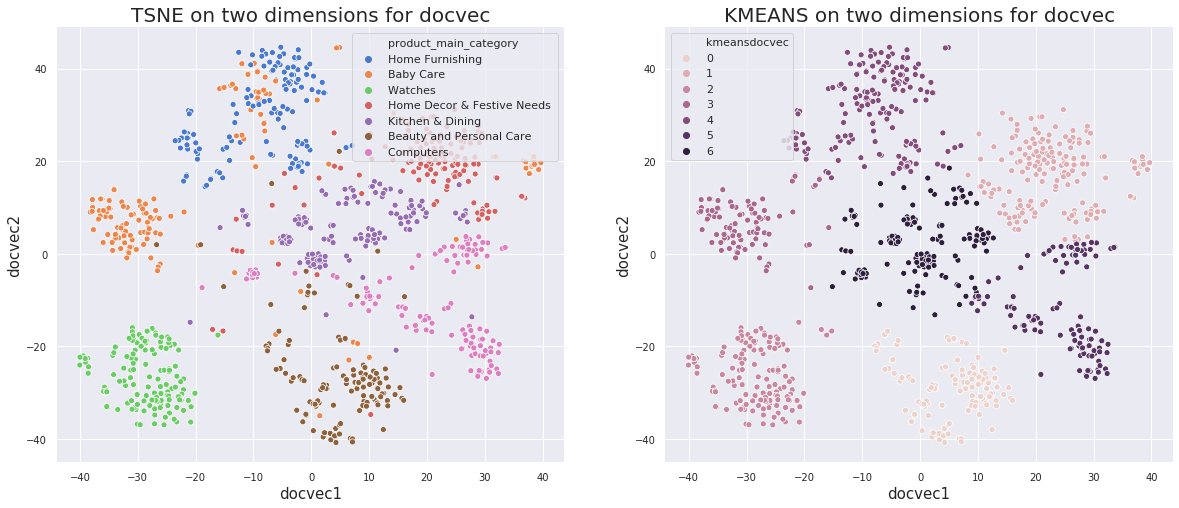

In [49]:
pdateddocvec_df, silhouette_docvec, calinski_docvec = tsne_analysis(input_df, X_docvec, 'docvec')